In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

In [101]:
data = pd.read_csv("/Users/leoadlakha/Documents/Research Work/TDTVD/csv/data.csv")

In [102]:
x = data.iloc[:, 3:]
y = data.iloc[:, 2]

In [103]:
y = np.array(y)
for i in range(len(y)) :
    if y[i] == 'Forged' :
        y[i] = 1 ;
    else :
        y[i] = 0
Y = y.astype('int')
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [104]:
X = []
for i in range(len(x)) :
    X.append(np.array(x.iloc[i, :]))

In [105]:
X

[array([175, 210, 210, 771, 175, 191, 236, 214, 235, 213, 222, 203, 340,
        237, 200, 182, 197, 180, 232, 204, 180, 388, 163, 192, 206, 209,
        222, 202, 184, 165, 347, 212, 197, 218, 167, 200, 177, 227, 199,
        374, 202, 238, 216, 199, 261, 206, 205, 237, 455, 218, 247, 221,
        260, 289, 267, 274, 262, 445, 301, 259, 219, 247, 266, 327, 332,
        271, 502, 338, 289, 355, 335, 413]),
 array([ 384,  300,  316, 1121,  265,  343,  358,  380,  336,  293,  295,
         323,  453,  308,  350,  290,  244,  339,  305,  310,  223,  456,
         261,  243,  227,  257,  278,  218,  218,  205,  429,  143,  184,
         148,  231,  168,  200,  177,  195,  442,  194,  161,  198,  203,
         223,  202,  194,  160,  380,  134,  196,  173,  179,  205,  185,
         166,  167,  279,  107,  173,  175,  169,  153,  148,  148,  146,
         315,  129,  165,  163,  144,  136]),
 array([128, 159, 135, 686, 118, 128, 162, 136, 144, 167, 181, 102, 259,
        149, 192, 190, 150,

In [92]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [93]:
X

array([[0.42896175, 0.66300366, 0.0697561 , ..., 0.95795796, 1.        ,
        1.        ],
       [1.        , 0.99267399, 0.12146341, ..., 0.38138138, 0.33910035,
        0.27105263],
       [0.30054645, 0.47619048, 0.03317073, ..., 0.42342342, 0.53633218,
        0.31315789],
       ...,
       [0.13114754, 0.26007326, 0.0502439 , ..., 0.15615616, 0.1384083 ,
        0.19210526],
       [0.12295082, 0.36996337, 0.03170732, ..., 0.28528529, 0.07958478,
        0.22631579],
       [0.20765027, 0.24542125, 0.05121951, ..., 0.30930931, 0.25259516,
        0.05789474]])

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state = 1)

In [108]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [109]:
clf.score(x_test, y_test)

0.8181818181818182

In [110]:
clf.score(x_train, y_train)

1.0

In [106]:
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X)

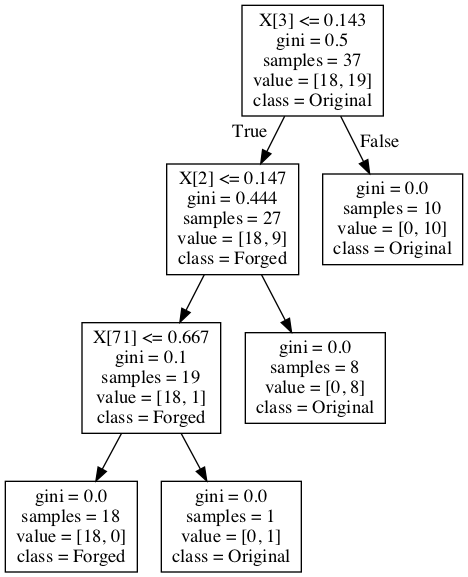

In [86]:
# This method is to store your classifier's tree in a pdf in the same 
# directory you are working in !

dot_data = export_graphviz(clf, out_file=None, class_names = ['Forged', 'Original'])
graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_pdf("iris.pdf")  Sirs way
# graph = graphviz.Source(dot_data) New Way
# graph.render("iris") 

Image(graph.create_png()) # Another imp way

In [150]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 10, random_state=0, min_samples_split=15, n_estimators=20, criterion='entropy')
clf.fit(x_train, y_train)
clf.score(x_test, y_test),clf.score(x_train, y_train)

(0.9090909090909091, 0.9534883720930233)